In [4]:
import pandas as pd
import numpy as np

# Set a random seed for reproducibility
np.random.seed(42)

# Number of customers
num_customers = 900000

# Generate synthetic data
customer_ids = range(1, num_customers + 1)
target = np.random.choice([0, 1], num_customers)

# Ensure a noticeable difference in the distribution of all features
avg_spend_3months = np.random.normal(700, 100, num_customers)
avg_spend_3months[target == 1] += 50

balance = np.random.normal(1200, 200, num_customers)
balance[target == 1] -= 100

revenue = np.random.normal(60, 10, num_customers)
revenue[target == 1] += 5

# Generate the likelihood of calling for annual fee waiver based on the previous call
annual_fee_waiver_prob = np.random.uniform(0, 1, num_customers)
annual_fee_waiver_call = (annual_fee_waiver_prob < 0.7) | (target == 1)

# Create a DataFrame
data = {
    'customer_id': customer_ids,
    'avg_spend_3months': avg_spend_3months,
    'balance': balance,
    'revenue': revenue,
    'annual_fee_waiver_call': annual_fee_waiver_call.astype(int),
    'target': target
}

df = pd.DataFrame(data)
df['target'] = df['target'].astype('object')
# Print the first few rows of the dataset
print(df.head())

# Save the dataset to a CSV file
# df.to_csv('customer_dataset.csv', index=False)


   customer_id  avg_spend_3months      balance    revenue  \
0            1         626.451289   584.352167  51.010182   
1            2         792.022824  1338.924188  54.726075   
2            3         626.196896  1250.148588  69.775223   
3            4         622.199761   823.930253  61.056011   
4            5         688.963419  1243.649512  64.123559   

   annual_fee_waiver_call target  
0                       1      0  
1                       1      1  
2                       1      0  
3                       1      0  
4                       0      0  


In [5]:
import joypy
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import cm


# PDF Explanation:

Imagine you have a continuous random variable, let's say the height of people. Unlike rolling a die where you have a finite number of outcomes (1, 2, 3, 4, 5, or 6), height can vary infinitely—someone could be 150 cm tall, 151 cm tall, 150.5 cm tall, and so on.

Now, let's think about a tiny range of heights, say between 170 cm and 171 cm. Within this small range, there might be many people whose heights fall within it. The probability density tells you how many people, on average, are within that tiny height range.

So, if the probability density of heights between 170 cm and 171 cm is higher compared to the density between 160 cm and 161 cm, it means, on average, there are more people with heights in the 170-171 cm range than in the 160-161 cm range.

Imagine probability density as the concentration of the likelihood of finding values within a small interval along the continuous scale of possible values.

In a plot, the area under the curve within a certain range represents the probability that the variable falls within that range. The taller the curve in an interval, the more likely the variable will be found in that interval.

# KDE Explanation:

Histogram Bars (Count): Suppose you have a histogram showing the distribution of heights. Each bar represents the count of people within a certain height range. For instance, a bar from 170 cm to 171 cm might indicate that 10 people fall within this range.

KDE Curve (Probability Density): Now, when you set kde=True, you add a KDE curve to the plot. Imagine this curve smoothly fitting the tops of the histogram bars. The y-axis of the KDE doesn't represent a count; instead, it represents the probability density of finding a person at a specific height.

If the y-axis of the KDE is higher at 170.5 cm, it suggests a higher likelihood of finding a person with a height around 170.5 cm.
The area under the KDE curve within a range (say, between 170 cm and 171 cm) gives you the probability of finding a person with a height in that range.
So, if you see a peak in the KDE at 170.5 cm, it indicates that, in terms of probability density, more people are likely to have heights around 170.5 cm compared to other nearby heights.

In summary, while the histogram gives you counts within specific intervals, the KDE provides a smooth estimate of the probability density along the entire range of values, offering insights into where values are more or less likely to occur.

Kernel Density Estimation (KDE) is a non-parametric technique used for estimating the probability density function (PDF) of a random variable. The term "non-parametric" indicates that KDE doesn't assume a specific functional form for the underlying distribution.

# Likelihood vs Probability:

Likelihood is used in the context of estimating unknown parameters of a statistical model. It refers to the probability of observing the given data given a particular set of parameter values.  For instance, in a coin toss, if we want to estimate the probability of getting heads (the parameter) based on observed flips (the data), the likelihood function would show how likely different values of the probability of heads explain the observed outcomes.

Probability: measure of the likelihood that an event will occur. It's a numerical value between 0 and 1, where 0 means the event will not occur, 1 means the event will definitely occur, and values in between indicate the likelihood of occurrence. It's associated with a specific event happening given certain conditions or assumptions. For example, the probability of getting heads when flipping a fair coin is 0.5.



In [6]:
%matplotlib inline
def create_ridgeline(by="target",columns="avg_spend_3months"):
    fig, axes = joypy.joyplot(df, by=by, column=columns,
                              hist=True, bins=30, overlap=0,
                              grid=True, legend=True)
    return fig,axes

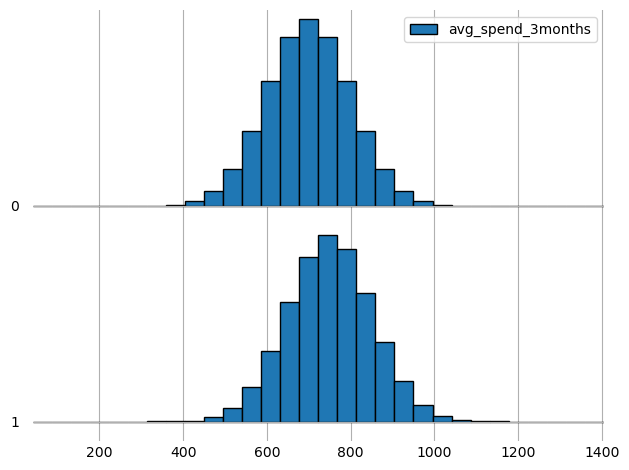

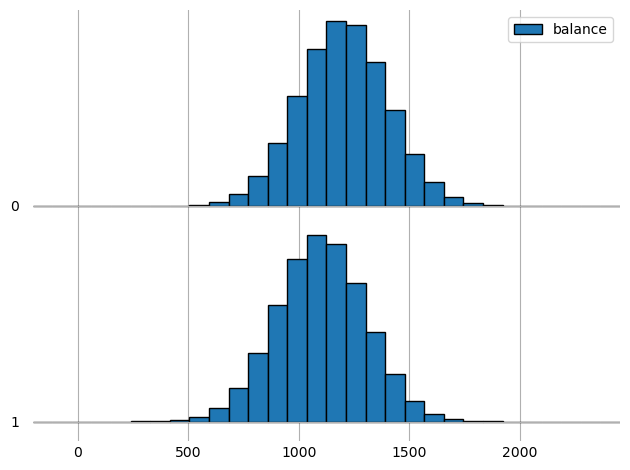

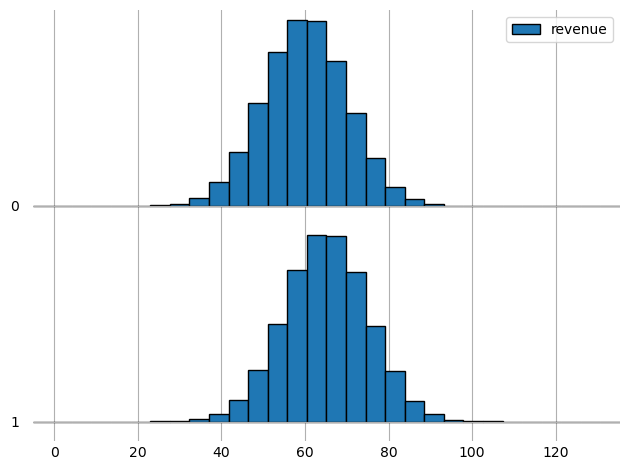

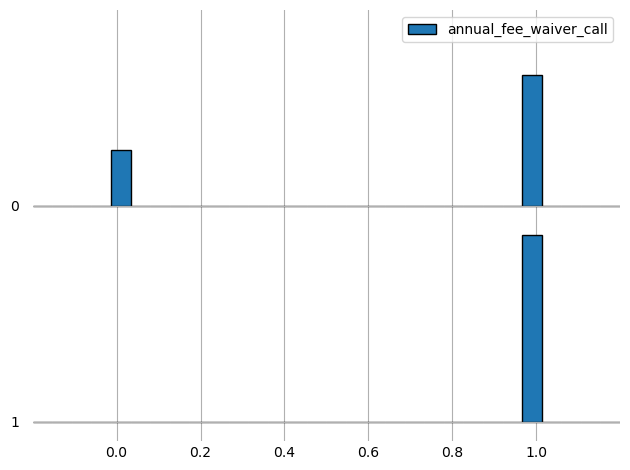

In [10]:
for col in df.columns[1:len(df.columns)-1]:
    create_ridgeline(by='target', columns = col)